In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /home/mabitbol/GBT-S140/analysis/

/home/mabitbol/GBT-S140/analysis


In [3]:
import foregrounds as fg
from scipy.optimize import curve_fit
import spectra as spec
import glob

In [4]:
from __future__ import unicode_literals

figsize(8, 6)

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
    
rcParams['xtick.labelsize'] = 30
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1

rcParams['ytick.labelsize'] = 30
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 10
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1

rcParams['legend.fontsize'] = 24
rcParams['legend.borderaxespad'] = 1

rcParams['axes.labelsize'] = 30
rcParams['axes.titlesize'] = 30

In [5]:
freqs = np.logspace(8, 13, 2000)
nu = freqs*1.e-9

In [6]:
# aperture is from 60' to 80' because of the size of our GBT maps. 
# radius is 45'
# smoothed by 40'

In [7]:
spectrum = spec.AperturePhotometry(inside=60., outside=80., radius=45.)

In [8]:
# 408 MHz
cgpsfreq = [408.e6]
cgpsflux, cgpserr = spectrum.get_cgps_flux(sbeam=40.)
cgpsflux = np.array([cgpsflux])
cgpserr = np.array([cgpserr])

In [9]:
# 1420 MHz
stockertfreq = [1.42e9]
stockertflux, stockerterr = spectrum.get_21cm_flux(sbeam=40.)
stockertflux = np.array([stockertflux])
stockerterr = np.array([stockerterr])

Sigma is 7.404216 arcmin (0.002154 rad) 
-> fwhm is 17.435596 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [10]:
# GBT
gbtA = 18.0860055748
gbtB = 17.5061433323
gbtC = 17.7466661872
gbtAerr = 2.
gbtBerr = 2.
gbtCerr = 2.
gbtfreqs = [4.575e9, 5.625e9, 6.125e9]
gbtflux = [gbtA, gbtB, gbtC]
gbterrs = [gbtAerr, gbtBerr, gbtCerr]

In [11]:
pfiles = ['../externaldata/planck_smoothed_28_40.fits',
 '../externaldata/planck_smoothed_44_40.fits',
 '../externaldata/planck_smoothed_70_40.fits',
 '../externaldata/planck_smoothed_143_40.fits',
 '../externaldata/planck_smoothed_217_40.fits',
 '../externaldata/planck_smoothed_353_40.fits',
 '../externaldata/planck_smoothed_545_40.fits',
 '../externaldata/planck_smoothed_857_40.fits']

In [12]:
# Planck
planckfreqs = spectrum.planckfreqs
planckflux, planckerrs = spectrum.run_experiment(pfiles)
planckerrs = np.sqrt( (0.03 * np.array(planckflux))**2 + np.array(planckerrs)**2)

In [13]:
irisfiles = ['../externaldata/iris_smoothed_25000_40.fits', \
            '../externaldata/iris_smoothed_12000_40.fits', \
            '../externaldata/iris_smoothed_5000_40.fits', \
            '../externaldata/iris_smoothed_3000_40.fits']

In [14]:
# IRIS
irisfreqs = spectrum.irisfreqs
irisflux, iriserrs = spectrum.run_experiment(irisfiles)
iriserrs = np.array(iriserrs)

In [15]:
dirbefiles = ['../externaldata/dirbe_smoothed_1250_40.fits', \
             '../externaldata/dirbe_smoothed_2142_40.fits', \
             '../externaldata/dirbe_smoothed_3000_40.fits']

In [16]:
# DIRBE
dirbefreqs = [1250.e9, 2142e9, 3000e9]
dirbeflux, dirbeerrs = spectrum.run_experiment(dirbefiles)
dirbeerrs = np.array(dirbeerrs)

In [17]:
bigfreqs = np.concatenate([cgpsfreq, stockertfreq, gbtfreqs, planckfreqs, irisfreqs, dirbefreqs])

In [18]:
bigfreqs1 = np.concatenate([cgpsfreq, stockertfreq, planckfreqs, irisfreqs, dirbefreqs])

In [19]:
bigflux = np.concatenate([cgpsflux, stockertflux, gbtflux, planckflux, irisflux, dirbeflux])

In [20]:
bigflux1 = np.concatenate([cgpsflux, stockertflux, planckflux, irisflux, dirbeflux])

In [21]:
bigerrs = np.concatenate([cgpserr, stockerterr, gbterrs, planckerrs, iriserrs, dirbeerrs])

In [22]:
bigerrs1 = np.concatenate([cgpserr, stockerterr, planckerrs, iriserrs, dirbeerrs])

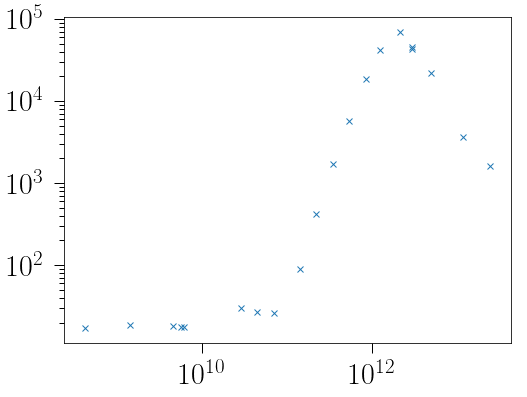

In [23]:
loglog(bigfreqs, bigflux, 'x')

In [24]:
def signal(freqs, EM, Asd, nup, Ad, Bd, Td, Acmb):
    fffit = fg.freefreep(freqs, EM=EM, Te=8000)
    amefit = fg.ame(freqs, Asd=Asd, nup=nup) 
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=Td)
    ccmb = fg.cmb(freqs, A=Acmb)
    return (fffit + dustfit + amefit + ccmb) * beam

In [25]:
def signal2(freqs, EM1, EM2, abeam, Ad, Bd, Td, Acmb):
    fffit = fg.freefreep(freqs, EM=EM1, Te=8000) * beam
    fffit2 = fg.freefreep(freqs, EM=EM2, Te=8000) * abeam
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=Td) * beam
    ccmb = fg.cmb(freqs, A=Acmb) * beam
    return fffit + fffit2 + dustfit + ccmb

In [27]:
mask = bigfreqs <= 3e12

In [28]:
bigfreqs[mask]

array([  4.08000000e+08,   1.42000000e+09,   4.57500000e+09,
         5.62500000e+09,   6.12500000e+09,   2.84000000e+10,
         4.41000000e+10,   7.04000000e+10,   1.43000000e+11,
         2.17000000e+11,   3.53000000e+11,   5.45000000e+11,
         8.57000000e+11,   3.00000000e+12,   1.25000000e+12,
         2.14200000e+12,   3.00000000e+12])

In [29]:
bigflux[mask]

array([  1.69932098e+01,   1.88907320e+01,   1.80860056e+01,
         1.75061433e+01,   1.77466662e+01,   3.02925356e+01,
         2.67933107e+01,   2.61128183e+01,   9.05264927e+01,
         4.16199852e+02,   1.72719297e+03,   5.70690360e+03,
         1.84255235e+04,   4.50374554e+04,   4.13180614e+04,
         6.93541594e+04,   4.27704104e+04])

In [30]:
bigerrs[mask]

array([  2.63219005e+00,   1.98121311e+00,   2.00000000e+00,
         2.00000000e+00,   2.00000000e+00,   1.16505200e+00,
         1.09064996e+00,   1.29007422e+00,   4.98904303e+00,
         1.98394742e+01,   7.92722760e+01,   2.50315395e+02,
         7.56000198e+02,   6.89009333e+02,   1.08024285e+03,
         1.45376870e+03,   8.27677537e+02])

In [31]:
beam = pi*((45./60.)*pi/180.)**2
beam2 = pi*((1./60./60.)*pi/180.)**2

In [32]:
pn = np.array([100., 1.e-3, 30.e9, 1.e-4, 2., 20., 30.e-6])
x = curve_fit(signal, bigfreqs[mask], bigflux[mask], p0=pn, sigma=bigerrs[mask], absolute_sigma=True)
pfit1 = x[0]

In [33]:
pn2 = np.array([100., 1.e9, 5.e-10, 1.e-4, 2., 20., 30e-6])
y = curve_fit(signal2, bigfreqs[mask], bigflux[mask], p0=pn2, sigma=bigerrs[mask], absolute_sigma=True)
pfit2 = y[0]

In [34]:
pfit1

array([  3.41395125e+02,   1.38546222e-03,   3.22727593e+10,
         1.21655060e-03,   1.60978111e+00,   2.13964546e+01,
         6.52986371e-05])

In [35]:
pfit2

array([  2.97051994e+02,   5.72662058e+08,   4.94960409e-10,
         1.26752754e-03,   1.49634458e+00,   2.20846709e+01,
        -1.40328563e-04])

In [36]:
np.sqrt(4.60737512e-10 / pi) * 180. / pi * 60. * 60. # arcseconds

2.4979111306502078

In [37]:
figsize(16, 10)

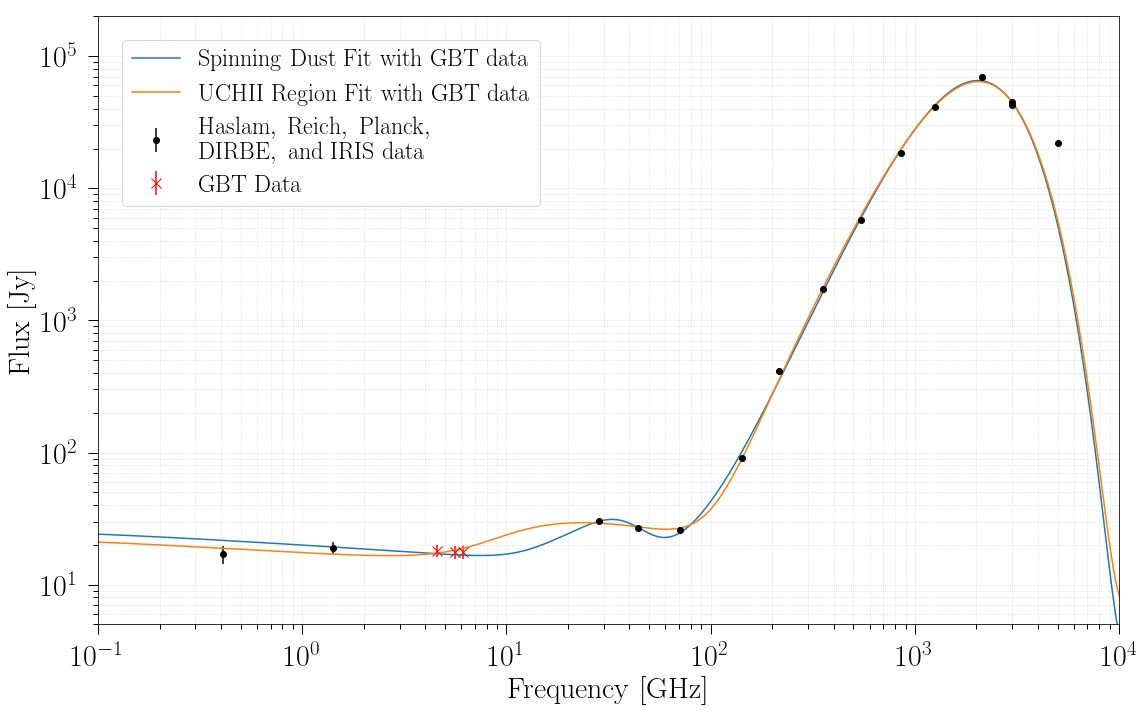

In [38]:
plot(nu, signal(freqs, *pfit1), label='$\mathrm{Spinning\ Dust\ Fit\ with\ GBT\ data}$')
plot(nu, signal2(freqs, *pfit2), label='$\mathrm{UCHII\ Region\ Fit\ with\ GBT\ data}$')
errorbar(bigfreqs1*1.e-9, bigflux1, yerr=bigerrs1, fmt='ko', 
         label='$\mathrm{Haslam,\ Reich,\ Planck,}$\n$\mathrm{DIRBE,\ and\ IRIS\ data}$')
errorbar(np.array(gbtfreqs)*1e-9, gbtflux, yerr=gbterrs, fmt='rx', markersize=10, label='$\mathrm{GBT\ Data}$')

xscale('log')
yscale('log')
xlabel('$\mathrm{Frequency\ [GHz]}$')
ylabel('$\mathrm{Flux\ [Jy]}$')
legend(loc=2, ncol=1)
grid(ls='dotted', alpha=0.5)
grid(which='minor', ls='dotted', alpha=0.5)
ylim(5, 2e5)
xlim(1e-1, 1e4)
tight_layout()
#savefig('../notebooks/fullspectrum_with_gbt.pdf', format='pdf')

In [51]:
ame0a = fg.ame(freqs, pfit1[1], pfit1[2]) * beam
ff2a = fg.freefreep(freqs, EM=pfit2[1]) * pfit2[2]

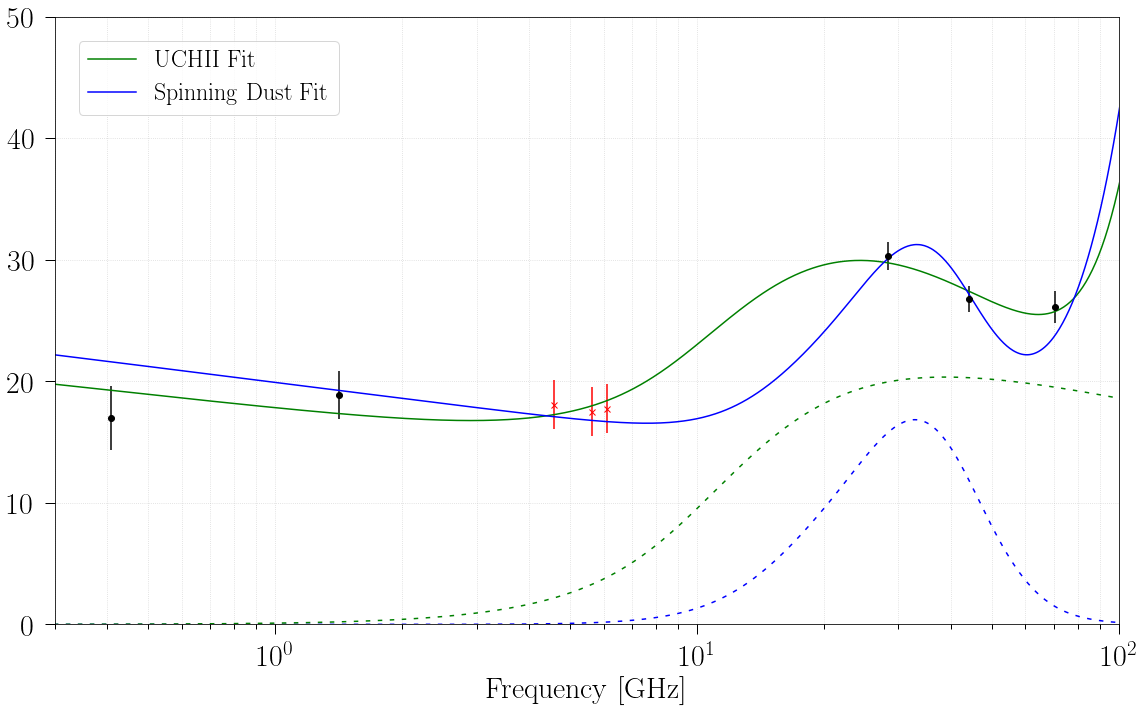

In [52]:
plot(nu, signal2(freqs, *pfit2), 'green', label='$\mathrm{UCHII\ Fit}$')
plot(nu, signal(freqs, *pfit1), 'blue', label='$\mathrm{Spinning\ Dust\ Fit}$')
errorbar(bigfreqs1*1.e-9, bigflux1, yerr=bigerrs1, fmt='ko')
errorbar(np.array(gbtfreqs)*1e-9, gbtflux, yerr=gbterrs, fmt='rx')

alpha = 0.3
plot(nu, ame0a, 'blue', ls='dashed', dashes=(3,5))
plot(nu, ff2a, 'green', ls='dashed', dashes=(3,5))

xscale('log')
ylim(0, 50)
xlim(0.3, 100)
xlabel('$\mathrm{Frequency\ [GHz]}$')
legend(loc=2, ncol=1)
grid(ls='dotted', alpha=0.5)
grid(which='minor', ls='dotted', alpha=0.5)
tight_layout()
savefig('../notebooks/amefit.pdf', format='pdf')